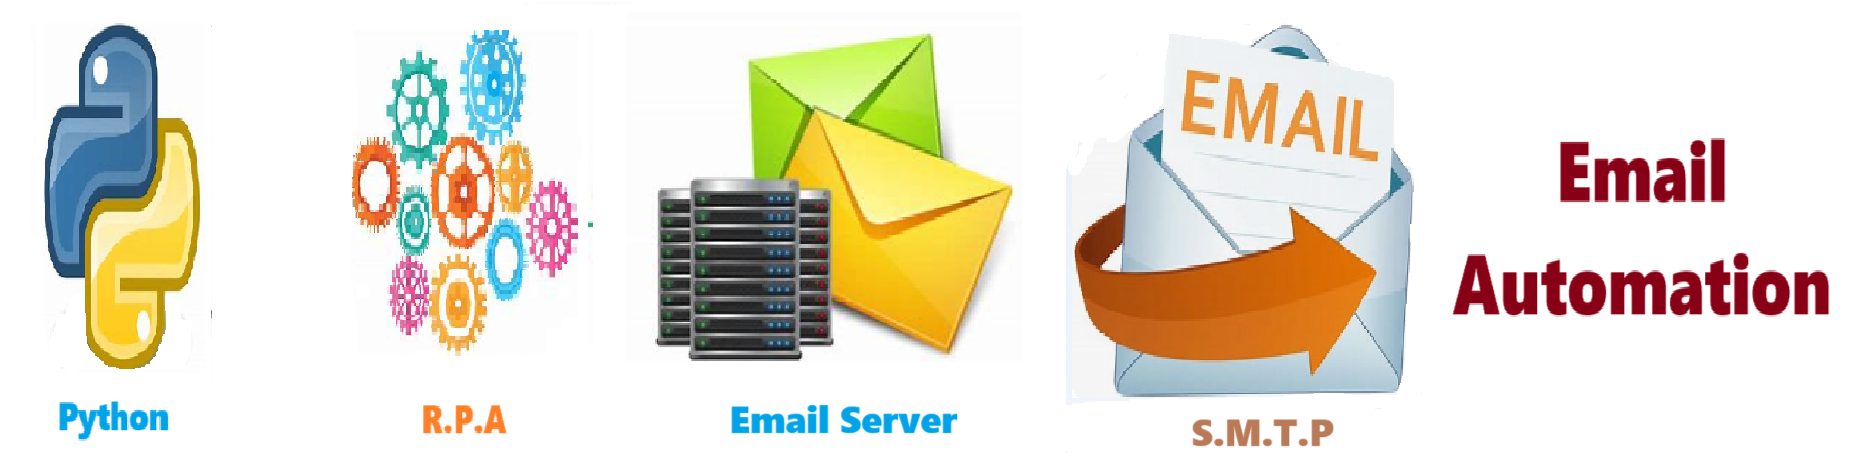

# Email Automation 
#### by Joe Eberle started on 08_29_2023

Process Steps :
1. Automatically Send ANY email
2. Add attachements
3. Felixible use of SMTP 

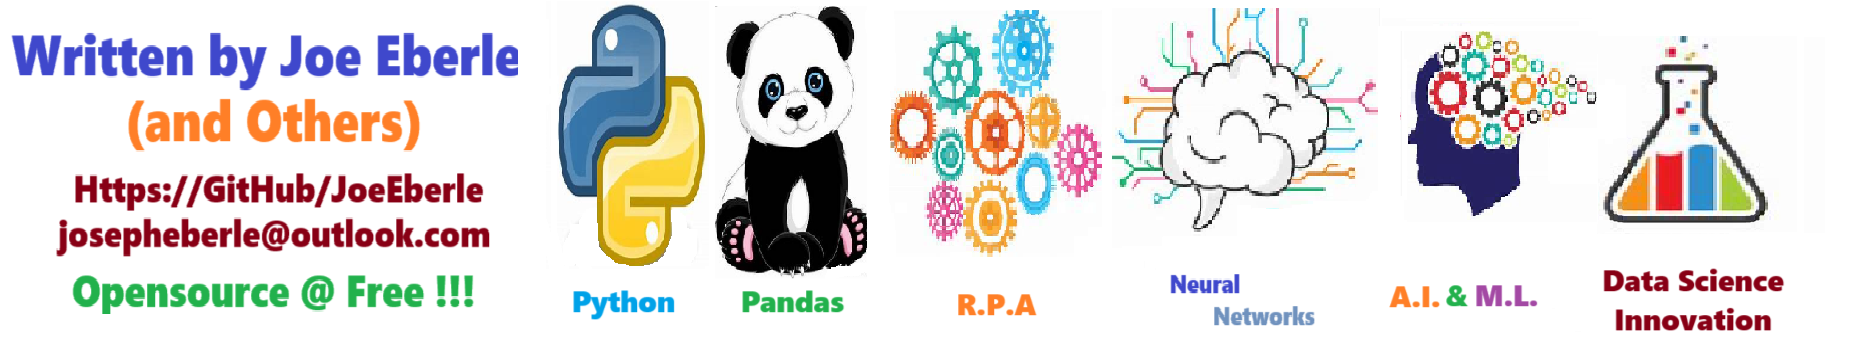

In [1]:
# Import all of the libraries you need  !pip install pandas_profiling
import pandas as pd #Pandas is high performance data manipulation 
import matplotlib.pyplot as plt   # matplot is for python graphics
import numpy as np   #numpy is for array processing
import seaborn  as sns

## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [2]:
import configparser 
config = configparser.ConfigParser()
cfg = config.read('config.ini')  

solution_name = 'email_automation'

## Optional Step 0 - Intitiate Configuration Settings and name the overall solution

In [3]:
# Establish the Python Logger  
import logging # built in python library that does not need to be installed 
import quick_logger as ql

global start_stime 
start_time = ql.set_start_time()
logging = ql.create_logger_Start(solution_name, start_time) 

In [4]:
Introduction =  "Email automation is easy to set up.  "
Introduction = Introduction + "Email automation utilizes The S.M.T.P protocol  "
Introduction = Introduction + "The S.M.T.P stands for Simple Mail Transport Protocol  "
Introduction = Introduction + "It is a protocol used for sending and relaying email messages over a network, typically the Internet.  "
Introduction = Introduction + "All you have to set up is the email server and port and your user name and password  " 
Introduction = Introduction + "You can even use it to automatically distribute your reports " 


talking_introduction  = False
if talking_introduction:
    print(Introduction)
    ql.talk(Introduction)
else:
    print(Introduction)


Email automation is easy to set up.  Email automation utilizes The S.M.T.P protocol  The S.M.T.P stands for Simple Mail Transport Protocol  It is a protocol used for sending and relaying email messages over a network, typically the Internet.  All you have to set up is the email server and port and your user name and password  You can even use it to automatically distribute your reports 


## Step 1 - Send mail using SMTP 

In [10]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.application import MIMEApplication
from email.mime.base import MIMEBase
from email import encoders

def send_mail(sender_email, sender_password, recipient_email, subject, message_text, attachments=None):
    # Create the email message
    message = MIMEMultipart()
    message["From"] = sender_email
    message["To"] = recipient_email
    message["Subject"] = subject

    # Attach message text
    message.attach(MIMEText(message_text, "plain"))

    # Attach attachments if provided
    if attachments:
        for attachment in attachments:
            part = MIMEBase("application", "octet-stream")
            part.set_payload(open(attachment, "rb").read())
            encoders.encode_base64(part)
            part.add_header("Content-Disposition", f"attachment; filename= {attachment}")
            message.attach(part)

    # Connect to Gmail's SMTP server
    server = smtplib.SMTP("smtp.gmail.com", 587)
    server.starttls()
    server.login(sender_email, sender_password)

    # Send the email
    server.sendmail(sender_email, recipient_email, message.as_string())

    # Disconnect from the SMTP server
    server.quit()

    print("Email sent successfully.")

 

In [11]:
# Test 1: Sending a simple text email
send_mail(
    sender_email="jaetestmail@gmail.com",
    sender_password="jaetestpw1",
    recipient_email="jaetestmail@gmail.com",
    subject="Hello from Email Automation USING SMTP",
    message_text="This is a test email sent from Python."
)

SMTPAuthenticationError: (535, b'5.7.8 Username and Password not accepted. Learn more at\n5.7.8  https://support.google.com/mail/?p=BadCredentials n15-20020a0ce48f000000b0065b10dbcd53sm150827qvl.120 - gsmtp')

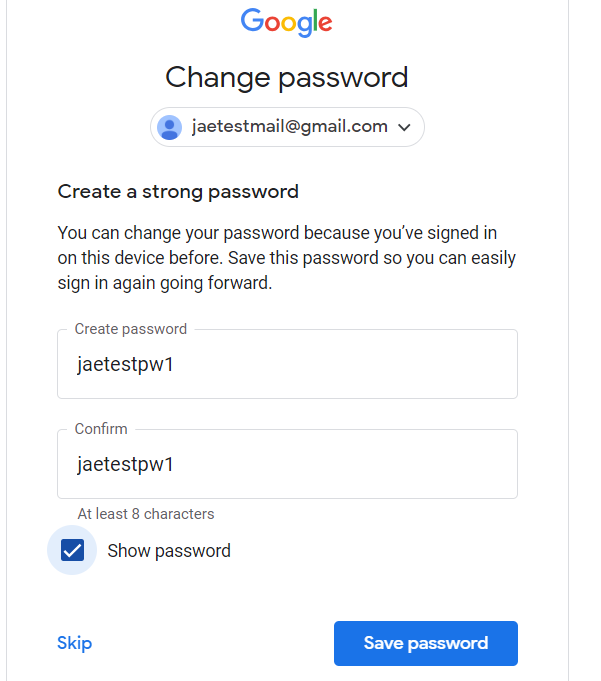


## Step 0 - Process End - display log

In [8]:
# Calculate and classify the process performance 
status = ql.calculate_process_performance(solution_name, start_time) 
print(ql.append_log_file(solution_name))  

2023-08-29 21:18:04,658 - INFO - START email_automation =============================================
2023-08-29 21:18:04,658 - INFO - START email_automation Start Time = 2023-08-29 21:18:04
2023-08-29 21:18:04,658 - INFO - email_automation Step 0 - Initialize the configuration file parser
2023-08-29 21:18:12,210 - INFO - PERFORMANCE email_automation The total process duration was:7.55
2023-08-29 21:18:12,210 - INFO - PERFORMANCE email_automation Stop Time = 2023-08-29 21:18:12
2023-08-29 21:18:12,210 - INFO - PERFORMANCE email_automation Low process duration less than 3 minutes:7.55
2023-08-29 21:18:12,210 - INFO - PERFORMANCE email_automation Performance optimization is optional
2023-08-29 21:18:12,210 - INFO - END email_automation =============================================



# https://github.com/JoeEberle/
# josepheberle@outlook.com 

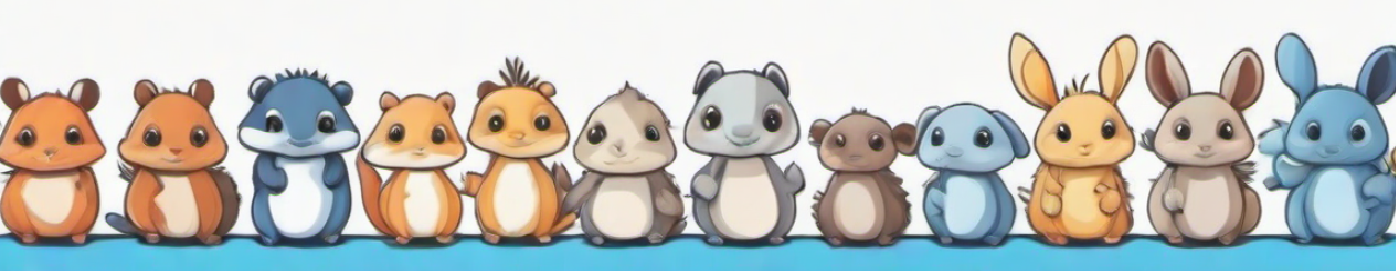